# Sigma54-Cy3 binding to DNA (Larry)

## Setup

Import required modules

In [1]:
import math
import numpy as np
import pandas as pd
import torch
from pathlib import Path

import pyro
import pyro.distributions as dist
from pyro.ops.stats import hpdi
from pyro.infer import Predictive

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from tapqir.models import Cosmos
from tapqir.utils.dataset import GlimpseDataset
from tapqir.utils.imscroll import count_intervals, time_to_first_binding, \
    association_rate, dissociation_rate, bootstrap, posterior_estimate, \
    bound_dwell_times, unbound_dwell_times, sample_and_bootstrap

from tapqir.utils.mle_analysis import train, double_exp_model, double_exp_guide, ttfb_model, ttfb_guide

### Load results

In [2]:
path_data = Path("/shared/centaur/data/test/Larry/")
path_params = path_data / "runs/cosmos/v1.1.6/S1/control/lr0.005/bs2"

glimpse = GlimpseDataset(path_data)

# load parameters
model = Cosmos(S=1, K=2)
model.load(path_data, True, "cpu")
model.load_parameters(path_params)

In [4]:
model.control

CosmosDataset(N=157, F=3855, D=14, dtype=control)

### Figure 5

In [ ]:
model.n = None
predictive = Predictive(pyro.poutine.uncondition(model.model), guide=model.guide, num_samples=1)
samples = predictive()

In [ ]:
aois = [1, 1, 1, 1, 1, 1]
frames = [20, 31, 43, 29, 39, 42]

plt.figure(figsize=(3.5, 0.6))
for i, n, f in zip(np.arange(6), aois, frames):
    plt.subplot(1, 6, i+1)
    plt.title(f"{n}\n{f}", fontsize=8)
    plt.hist(
        model.data[n, f].flatten().numpy(),
        range=(model.data.vmin-20, model.data.vmax+50),
        density=True, bins=10, alpha=0.5, label="data")
    plt.hist(
        samples["d/data"][0, n, f].flatten().numpy(),
        range=(model.data.vmin-10, model.data.vmax+50),
        density=True, bins=20, alpha=0.5, label="posterior")
    plt.xlim(70, model.data.vmax+50)
    plt.xticks([], [])
    plt.yticks([], [])

# plt.tight_layout()
plt.savefig("/tmp/larry-hist.svg")

plt.show()

In [ ]:
plt.figure(figsize=(3.5, 1))
for i, n, f in zip(np.arange(6), aois, frames):
    plt.subplot(1, 6, i+1)
    
    plt.imshow(model.data[n, f].numpy(), vmin=model.data.vmin, vmax=model.data.vmax+50, cmap="gray")
    plt.xticks([], [])
    plt.yticks([], [])

#plt.tight_layout()
plt.savefig("/tmp/larry-data.png", dpi=600)

plt.show()

In [ ]:
plt.figure(figsize=(3.5, 1))
for i, n, f in zip(np.arange(6), aois, frames):
    plt.subplot(1, 6, i+1)
    plt.imshow(samples["d/data"][0, n, f].numpy(), vmin=model.data.vmin, vmax=model.data.vmax+50, cmap="gray")
    plt.xticks([], [])
    plt.yticks([], [])

# plt.tight_layout()
plt.savefig("/tmp/larry-sample.png", dpi=600)

plt.show()

### Figure 7

In [3]:
path_data = Path("/shared/centaur/data/test/Larry/")
path_params = path_data / "runs/cosmos/v1.1.6/S1/control/lr0.005/bs2"

# load parameters
model = Cosmos(S=1, K=2)
model.load(path_data, True, "cpu")
model.load_parameters(path_params)

data = time_to_first_binding(model.z_map)
control = None
Tmax = model.data.F

train(
    ttfb_model, ttfb_guide, lr=5e-3, n_steps=10000,
    data=data, control=control, Tmax=Tmax
)

<ipython-input-3-af0b5be22ad8>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data, dtype=torch.float)


('ka: 0.03156387060880661', 'kns: 0.006375868804752827', 'Af: 0.38696616888046265')
('ka: 0.022373737767338753', 'kns: 0.0045607122592628', 'Af: 0.3084249496459961')
('ka: 0.017743095755577087', 'kns: 0.003546729451045394', 'Af: 0.2589287757873535')
('ka: 0.01548432931303978', 'kns: 0.0029320353642106056', 'Af: 0.229505255818367')
('ka: 0.014551869593560696', 'kns: 0.002537595806643367', 'Af: 0.21350380778312683')
('ka: 0.014314915053546429', 'kns: 0.0022737979888916016', 'Af: 0.20669570565223694')
('ka: 0.01427195593714714', 'kns: 0.0020916557405143976', 'Af: 0.20647181570529938')
('ka: 0.014025721698999405', 'kns: 0.001962330425158143', 'Af: 0.21130415797233582')
('ka: 0.013363183476030827', 'kns: 0.0018675688188523054', 'Af: 0.2205209881067276')
('ka: 0.012272720225155354', 'kns: 0.001794909592717886', 'Af: 0.23419839143753052')
('ka: 0.010873302817344666', 'kns: 0.0017352486029267311', 'Af: 0.2530900835990906')
('ka: 0.009350569918751717', 'kns: 0.001681558322161436', 'Af: 0.278541

('ka: 0.0036663359496742487', 'kns: 0.0004937011399306357', 'Af: 0.8568081259727478')
('ka: 0.003666332457214594', 'kns: 0.000493700907099992', 'Af: 0.8568081855773926')
('ka: 0.003666334319859743', 'kns: 0.0004937004414387047', 'Af: 0.8568083047866821')


In [4]:
Tmax = model.data.F
nz = sum(data == 0)
n = sum(data == Tmax)
N = len(data)
tau = data[(data > 0) & (data < Tmax)]

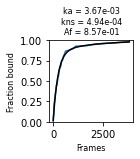

In [5]:
plt.figure(figsize=(1.5, 1.5))
x = torch.arange(model.data.F)
plt.plot(sorted(data), np.arange(1, N+1) / N)
plt.plot(
    x,
    nz / N +
    (1 - nz / N) *
    (pyro.param("Af").item()*(1 - np.exp(-(pyro.param("ka")+pyro.param("kns")).item() * x)) +
    (1 - pyro.param("Af").item())*(1 - np.exp(-pyro.param("kns").item() * x))),
    color="k"
)
plt.title(
    f"ka = {pyro.param('ka').item():.2e}\nkns = {pyro.param('kns').item():.2e}\nAf = {pyro.param('Af').item():.2e}",
    fontsize=8
)
plt.xlabel("Frames", fontsize=8)
plt.ylabel("Fraction bound", fontsize=8)
plt.ylim(0, 1)
plt.savefig("/tmp/larry-tapqir.svg")
plt.show()

In [6]:
path_data = Path("/shared/centaur/data/test/Larry/")
path_params = path_data / "runs/cosmos/v1.1.6/S1/control/lr0.005/bs2"

# load parameters
model = Cosmos(S=1, K=2)
model.load(path_data, True, "cpu")
model.load_parameters(path_params)

dt = unbound_dwell_times(count_intervals(model.z_map))
dt = torch.tensor(dt, dtype=torch.float)

train(
    double_exp_model, double_exp_guide, lr=5e-3, n_steps=5000,
    data=dt
)

('k1: 0.06322470307350159', 'k2: 0.6980250477790833', 'A: 0.38846564292907715')
('k1: 0.04390384256839752', 'k2: 0.6577872037887573', 'A: 0.3141910135746002')
('k1: 0.03257032111287117', 'k2: 0.6577090620994568', 'A: 0.271303653717041')
('k1: 0.02533293142914772', 'k2: 0.6503773927688599', 'A: 0.2511945962905884')
('k1: 0.020413849502801895', 'k2: 0.636565625667572', 'A: 0.24667367339134216')
('k1: 0.01690780557692051', 'k2: 0.6190405488014221', 'A: 0.25191670656204224')
('k1: 0.014314388856291771', 'k2: 0.6003909111022949', 'A: 0.2620202898979187')
('k1: 0.012338710017502308', 'k2: 0.5825339555740356', 'A: 0.27324721217155457')
('k1: 0.01079737301915884', 'k2: 0.5664131045341492', 'A: 0.2834565341472626')
('k1: 0.009571139700710773', 'k2: 0.5521878600120544', 'A: 0.29195499420166016')
('k1: 0.008579567074775696', 'k2: 0.5396372675895691', 'A: 0.298862487077713')
('k1: 0.0077666351571679115', 'k2: 0.5284635424613953', 'A: 0.3045363426208496')
('k1: 0.007092319428920746', 'k2: 0.5184197

#### Rastegram

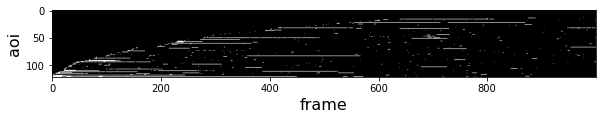

In [12]:
path_data = Path("/shared/centaur/data/test/Larry")
path_params = path_data / "runs/cosmos/v1.1.6/S1/control/lr0.005/bs2"

# load parameters
model = Cosmos(S=1, K=2)
model.load(path_data, True, "cpu")
model.load_parameters(path_params)

ttfb = time_to_first_binding(model.z_map)
# sort ttfb
sdx = torch.argsort(ttfb, descending=True)


figsize = torch.tensor([10, 10 * model.data.N / 1000])
plt.figure(figsize=figsize)
plt.imshow(model.z_map[sdx][:, :1000], cmap="gray")
plt.xlabel("frame", fontsize=16)
plt.ylabel("aoi", fontsize=16)
plt.show()

No handles with labels found to put in legend.


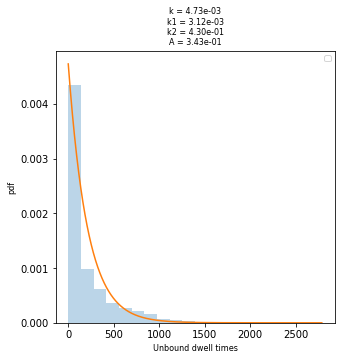

In [9]:
k = 1 / dt.mean()

plt.figure(figsize=(5, 5))
plt.title(
    f"k = {k:.2e}\nk1 = {pyro.param('k1').item():.2e}\nk2 = {pyro.param('k2').item():.2e}\nA = {pyro.param('A').item():.2e}",
    fontsize=8
)

plt.hist(dt.numpy(), bins=20, density=True, alpha=0.3)
x = torch.arange(0.01, dt.max())
d = dist.Exponential(k)
plt.plot(x, d.log_prob(x).exp())
d1 = (1 - pyro.param("A").item())*(dist.Exponential(pyro.param("k1").item()).log_prob(x)).exp()
d2 = pyro.param("A").item()*(dist.Exponential(pyro.param("k2").item()).log_prob(x)).exp()
#plt.plot(x, d1, label="A1")
#plt.plot(x, d2, label="A2")
#plt.plot(x, d1+d2, label="At")
plt.xlabel("Unbound dwell times", fontsize=8)
plt.ylabel("pdf", fontsize=8)
#plt.ylim(0, 0.2)
#plt.xlim(0, 100)
plt.legend(fontsize=8)
plt.savefig("/tmp/larry-kon.svg")
plt.show()

In [10]:
path_data = Path("/shared/centaur/data/test/Larry/")
path_params = path_data / "runs/cosmos/v1.1.6/S1/control/lr0.005/bs2"

# load parameters
model = Cosmos(S=1, K=2)
model.load(path_data, True, "cpu")
model.load_parameters(path_params)

dt = bound_dwell_times(count_intervals(model.z_map))
dt = torch.tensor(dt, dtype=torch.float)

train(
    double_exp_model, double_exp_guide, lr=5e-3, n_steps=5000,
    data=dt
)

('k1: 0.06501319259405136', 'k2: 0.6448267698287964', 'A: 0.6395891308784485')
('k1: 0.04772363230586052', 'k2: 0.5010232925415039', 'A: 0.7440629601478577')
('k1: 0.03811436519026756', 'k2: 0.44492149353027344', 'A: 0.8009169101715088')
('k1: 0.032682083547115326', 'k2: 0.4198564291000366', 'A: 0.8299474716186523')
('k1: 0.029614971950650215', 'k2: 0.40734565258026123', 'A: 0.8448246121406555')
('k1: 0.027914786711335182', 'k2: 0.40087348222732544', 'A: 0.8524988889694214')
('k1: 0.02700692042708397', 'k2: 0.3975483775138855', 'A: 0.8564121127128601')
('k1: 0.026547683402895927', 'k2: 0.39590004086494446', 'A: 0.8583405613899231')
('k1: 0.026330463588237762', 'k2: 0.3951279819011688', 'A: 0.8592407703399658')
('k1: 0.02623532898724079', 'k2: 0.3947914242744446', 'A: 0.8596326112747192')
('k1: 0.02619706280529499', 'k2: 0.394656240940094', 'A: 0.8597899079322815')
('k1: 0.026182975620031357', 'k2: 0.3946065604686737', 'A: 0.8598477244377136')
('k1: 0.026178276166319847', 'k2: 0.3945899

No handles with labels found to put in legend.


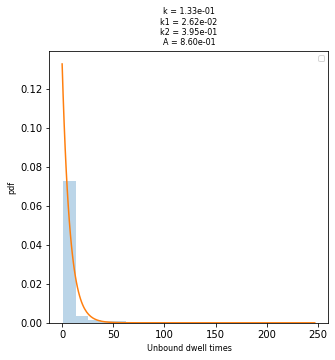

In [11]:
k = 1 / dt.mean()

plt.figure(figsize=(5, 5))
plt.title(
    f"k = {k:.2e}\nk1 = {pyro.param('k1').item():.2e}\nk2 = {pyro.param('k2').item():.2e}\nA = {pyro.param('A').item():.2e}",
    fontsize=8
)

plt.hist(dt.numpy(), bins=20, density=True, alpha=0.3)
x = torch.arange(0.01, dt.max())
d = dist.Exponential(k)
plt.plot(x, d.log_prob(x).exp())
d1 = (1 - pyro.param("A").item())*(dist.Exponential(pyro.param("k1").item()).log_prob(x)).exp()
d2 = pyro.param("A").item()*(dist.Exponential(pyro.param("k2").item()).log_prob(x)).exp()
#plt.plot(x, d1, label="A1")
#plt.plot(x, d2, label="A2")
#plt.plot(x, d1+d2, label="At")
plt.xlabel("Unbound dwell times", fontsize=8)
plt.ylabel("pdf", fontsize=8)
#plt.ylim(0, 0.2)
#plt.xlim(0, 100)
plt.legend(fontsize=8)
plt.savefig("/tmp/larry-koff.svg")
plt.show()

### DNA target sites

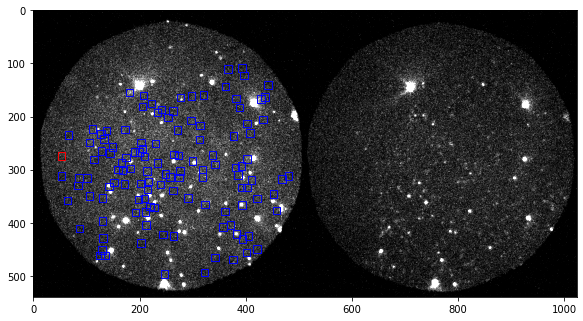

In [5]:
frame = data.drift.index[5]
plt.figure(figsize=(10, 10*glimpse.height/glimpse.width))
plt.imshow(glimpse[frame], cmap="gray", vmin=data.vmin, vmax=data.vmax)

for n in data.target.index:
    y_pos = data.target.at[n, "abs_y"] + data.drift.at[frame, "abs_dy"] - 7
    x_pos = data.target.at[n, "abs_x"] + data.drift.at[frame, "abs_dx"] - 7
    plt.gca().add_patch(Rectangle((y_pos, x_pos), 14, 14, edgecolor="b", facecolor="none"))
    #plt.gca().text(y_pos, x_pos, str(n), fontsize=10, color="white")

aoi = data.target.index[4]  
y_pos = data.target.at[aoi, "abs_y"] + data.drift.at[frame, "abs_dy"] - 7
x_pos = data.target.at[aoi, "abs_x"] + data.drift.at[frame, "abs_dx"] - 7
plt.gca().add_patch(Rectangle((y_pos, x_pos), 14, 14, edgecolor="r", facecolor="none"))
plt.show()

### Control non DNA sites

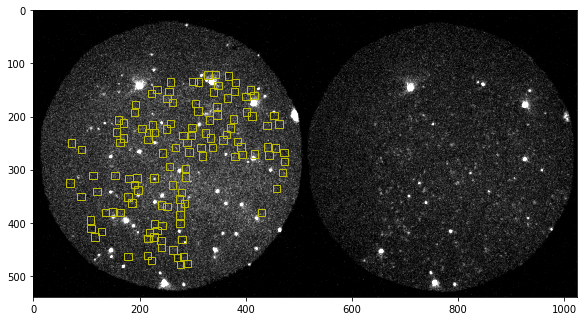

In [6]:
frame = data.drift.index[105]
plt.figure(figsize=(10, 10*glimpse.height/glimpse.width))
plt.imshow(glimpse[frame], cmap="gray", vmin=data.vmin, vmax=data.vmax)

for n in data.target.index:
    y_pos = control.target.at[n, "abs_y"] + control.drift.at[frame, "abs_dy"] - 7
    x_pos = control.target.at[n, "abs_x"] + control.drift.at[frame, "abs_dx"] - 7
    plt.gca().add_patch(Rectangle((y_pos, x_pos), 14, 14, edgecolor="y", facecolor="none"))

plt.show()

## Load parameters

In [5]:
path_params = os.path.join(path_data, "runs/cosmos/v1.1.6/S1/control/lr0.005/bs2")
# load global parameters
results = pd.read_csv(
    os.path.join(path_params, "global_params.csv"),
    header=None, squeeze=True, index_col=0)
# load parameters
model = Cosmos(S=1, K=2)
model.load(path_data, False, "cpu")
model.load_parameters(path_params)

### Intensity Model

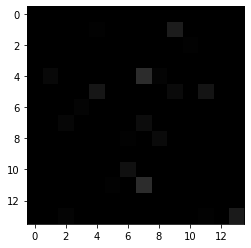

In [19]:
plt.imshow(model.data.offset[3561, 0, 1:15, 1:15].numpy(), vmin=model.data.vmin, vmax=model.data.vmax, cmap="gray")
plt.show()

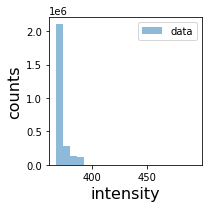

In [25]:
plt.figure(figsize=(3,3))
plt.hist(model.data.offset.flatten().numpy(), range=(model.data.vmin, model.data.vmax),
         density=True, bins=20, label="data", alpha=0.5)
#plt.ylim(0,30000)
#plt.xlim(-0.03,1.03)
#plt.title("pixel {},{}".format(i,i), fontsize=16)
plt.ylabel("counts", fontsize=16)
plt.xlabel("intensity", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

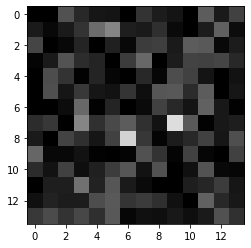

In [20]:
n = 4
f = 1168
plt.imshow(model.data[n,f].numpy(), vmin=model.data.vmin, vmax=model.data.vmax, cmap="gray")
plt.show()

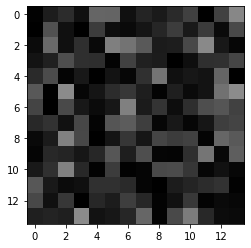

In [21]:
plt.imshow(samples["d/data"][0,n,f].numpy(), vmin=model.data.vmin, vmax=model.data.vmax, cmap="gray")
plt.show()

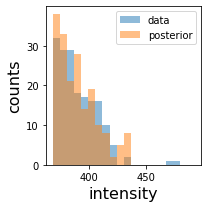

In [23]:
plt.figure(figsize=(3,3))
plt.hist(model.data[n,f].flatten().numpy(), range=(model.data.vmin, model.data.vmax), bins=20, label="data", alpha=0.5)
plt.hist(samples["d/data"][0,n,f].flatten().numpy(), range=(model.data.vmin, model.data.vmax), label="posterior", bins=20, alpha=0.5)
#plt.ylim(0,30000)
#plt.xlim(-0.03,1.03)
#plt.title("pixel {},{}".format(i,i), fontsize=16)
plt.ylabel("counts", fontsize=16)
plt.xlabel("intensity", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

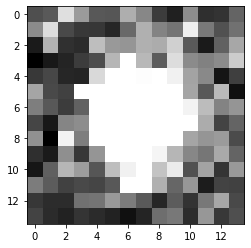

In [6]:
n = 20
f = 3561
plt.imshow(model.data[n,f].numpy(), vmin=model.data.vmin, vmax=model.data.vmax, cmap="gray")
plt.show()

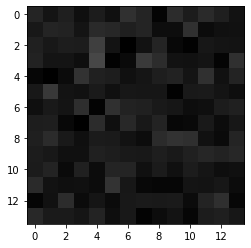

In [8]:
plt.imshow(samples["d/data"][0,n,f].numpy(), vmin=model.data.vmin, vmax=model.data.vmax, cmap="gray")
plt.show()

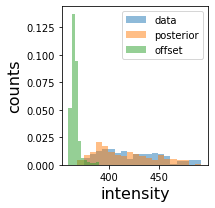

In [29]:
plt.figure(figsize=(3,3))
plt.hist(model.data[n,f].flatten().numpy(), range=(model.data.vmin, model.data.vmax),
         density=True, bins=20, label="data", alpha=0.5)
plt.hist(samples["d/data"][0,n,f].flatten().numpy(), range=(model.data.vmin, model.data.vmax),
         density=True, label="posterior", bins=20, alpha=0.5)
#plt.ylim(0,30000)
#plt.xlim(-0.03,1.03)
#plt.title("pixel {},{}".format(i,i), fontsize=16)
plt.hist(
        model.data.offset.flatten().numpy(),
        #range=(model.data.vmin, model.data.vmax),
        density=True, bins=10, alpha=0.5, label="offset")
plt.ylabel("counts", fontsize=16)
plt.xlabel("intensity", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
param("gain")

tensor(17.1781, grad_fn=<AddBackward0>)

In [5]:
# spots missed by cosmos
mask = (samples["d/theta"][0].numpy() == 0)

n, f = np.nonzero(mask)
idx = np.arange(len(n))
np.random.shuffle(idx)

plt.figure(figsize=(15,3))
for i in range(5):
    j = idx[i]
    plt.subplot(1, 5, i+1)
    plt.hist(
        model.data[n[j],f[j]].flatten().numpy(),
        range=(model.data.vmin, model.data.vmax),
        density=True, bins=20, alpha=0.5, label="data")
    plt.hist(
        samples["d/data"][0,n[j],f[j]].flatten().numpy(),
        range=(model.data.vmin, model.data.vmax),
        density=True, bins=20, alpha=0.5, label="posterior")
    #plt.hist(
    #    model.data.offset.flatten().numpy(),
        #range=(model.data.vmin, model.data.vmax),
    #    density=True, bins=10, alpha=0.5)
    #plt.ylim(0,30000)
    #plt.xlim(-0.03,1.03)
    plt.title("site {}, frame {}".format(n[j],f[j]), fontsize=16)
    plt.ylabel("counts", fontsize=16)
    plt.xlabel("intensity", fontsize=16)
    plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'samples' is not defined

In [14]:
# spots missed by cosmos
mask = (model.z_marginal.numpy() < 0.5)

n, f = np.nonzero(mask)
idx = np.arange(len(n))
np.random.shuffle(idx)

plt.figure(figsize=(10,6))
for i in range(5):
    j = idx[i]
    plt.subplot(3, 5, i+1)
    plt.imshow(model.data[n[j], f[j]].numpy(), vmin=model.data.vmin, vmax=model.data.vmax, cmap="gray")
    plt.subplot(3, 5, 5+i+1)
    plt.imshow(samples["d/data"][0, n[j], f[j]].numpy(), vmin=model.data.vmin, vmax=model.data.vmax, cmap="gray")
    plt.subplot(3, 5, 10+i+1)
    plt.hist(
        model.data[n[j],f[j]].flatten().numpy(),
        range=(model.data.vmin, model.data.vmax+50),
        density=True, bins=20, alpha=0.5, label="data")
    plt.hist(
        samples["d/data"][0,n[j],f[j]].flatten().numpy(),
        range=(model.data.vmin, model.data.vmax+50),
        density=True, bins=20, alpha=0.5, label="posterior")
    
    #plt.hist(
    #    model.data.offset.flatten().numpy(),
        #range=(model.data.vmin, model.data.vmax),
    #    density=True, bins=10, alpha=0.5)
    #plt.ylim(0,30000)
    #plt.xlim(-0.03,1.03)
    #plt.title("site {}, frame {}".format(n[j],f[j]), fontsize=16)
    #plt.ylabel("counts", fontsize=16)
    plt.xlabel("intensity", fontsize=16)
    # plt.legend()
plt.tight_layout()
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 720x432 with 0 Axes>

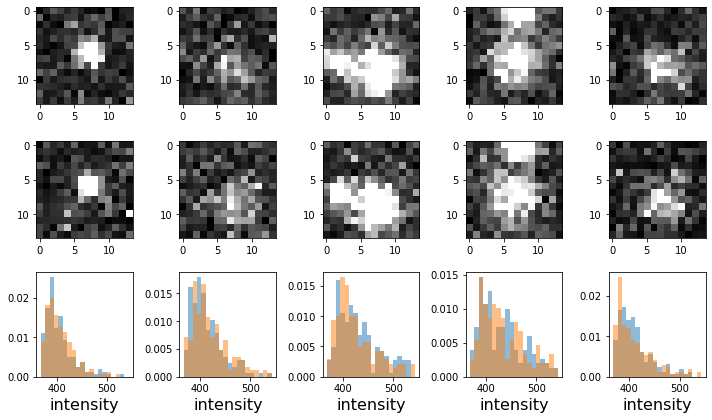

In [12]:
# spots missed by cosmos
mask = (model.z_marginal.numpy() > 0.5)

n, f = np.nonzero(mask)
idx = np.arange(len(n))
np.random.shuffle(idx)

plt.figure(figsize=(10,6))
for i in range(5):
    j = idx[i]
    plt.subplot(3, 5, i+1)
    plt.imshow(model.data[n[j], f[j]].numpy(), vmin=model.data.vmin, vmax=model.data.vmax+50, cmap="gray")
    plt.subplot(3, 5, 5+i+1)
    plt.imshow(samples["d/data"][0, n[j], f[j]].numpy(), vmin=model.data.vmin, vmax=model.data.vmax+50, cmap="gray")
    plt.subplot(3, 5, 10+i+1)
    plt.hist(
        model.data[n[j],f[j]].flatten().numpy(),
        range=(model.data.vmin, model.data.vmax+50),
        density=True, bins=20, alpha=0.5, label="data")
    plt.hist(
        samples["d/data"][0,n[j],f[j]].flatten().numpy(),
        range=(model.data.vmin, model.data.vmax+50),
        density=True, bins=20, alpha=0.5, label="posterior")
    
    #plt.hist(
    #    model.data.offset.flatten().numpy(),
        #range=(model.data.vmin, model.data.vmax),
    #    density=True, bins=10, alpha=0.5)
    #plt.ylim(0,30000)
    #plt.xlim(-0.03,1.03)
    #plt.title("site {}, frame {}".format(n[j],f[j]), fontsize=16)
    #plt.ylabel("counts", fontsize=16)
    plt.xlabel("intensity", fontsize=16)
    # plt.legend()
plt.tight_layout()
plt.show()

### How accurate is the fit? Sampling from the posterior

In [6]:
predictive = Predictive(model.model, guide=model.guide, num_samples=1)
samples = predictive()

**Diagonal pixels across all frames**

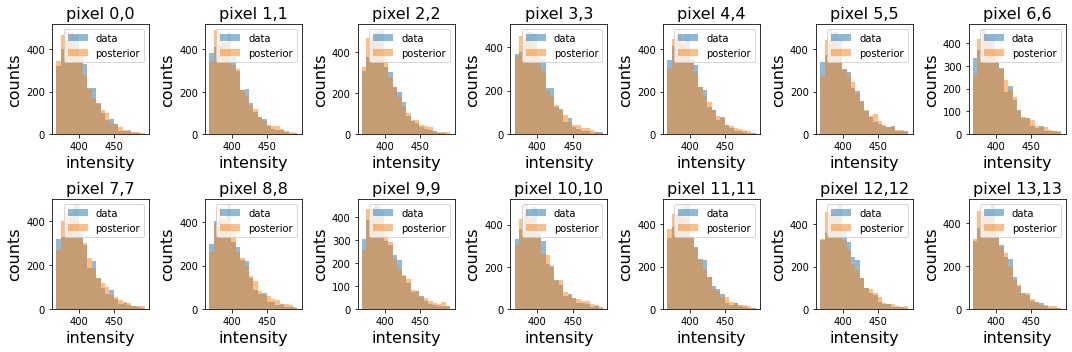

In [11]:
plt.figure(figsize=(15,5))
for i in range(14):
    plt.subplot(2, 7, i+1)
    plt.hist(model.data[n,:,i,i].flatten().numpy(), range=(model.data.vmin, model.data.vmax), bins=20, label="data", alpha=0.5)
    plt.hist(samples["d/data"][0,n,:,i,i].flatten().numpy(), range=(model.data.vmin, model.data.vmax), label="posterior", bins=20, alpha=0.5)
    #plt.ylim(0,30000)
    #plt.xlim(-0.03,1.03)
    plt.title("pixel {},{}".format(i,i), fontsize=16)
    plt.ylabel("counts", fontsize=16)
    plt.xlabel("intensity", fontsize=16)
    plt.legend()
plt.tight_layout()
plt.show()

**Images with the on-target spot**

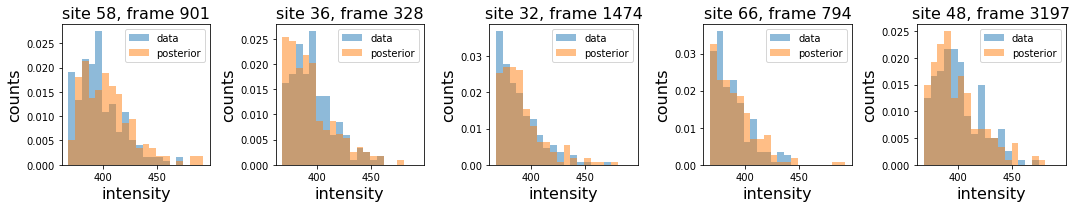

In [12]:
# spots missed by cosmos
mask = (model.z_marginal.numpy() > 0.5)

n, f = np.nonzero(mask)
idx = np.arange(len(n))
np.random.shuffle(idx)

plt.figure(figsize=(15,3))
for i in range(5):
    j = idx[i]
    plt.subplot(1, 5, i+1)
    plt.hist(
        model.data[n[j],f[j]].flatten().numpy(),
        range=(model.data.vmin, model.data.vmax),
        density=True, bins=20, alpha=0.5, label="data")
    plt.hist(
        samples["d/data"][0,n[j],f[j]].flatten().numpy(),
        range=(model.data.vmin, model.data.vmax),
        density=True, bins=20, alpha=0.5, label="posterior")
    #plt.hist(
    #    model.data.offset.flatten().numpy(),
        #range=(model.data.vmin, model.data.vmax),
    #    density=True, bins=10, alpha=0.5)
    #plt.ylim(0,30000)
    #plt.xlim(-0.03,1.03)
    plt.title("site {}, frame {}".format(n[j],f[j]), fontsize=16)
    plt.ylabel("counts", fontsize=16)
    plt.xlabel("intensity", fontsize=16)
    plt.legend()
plt.tight_layout()
plt.show()

**Images w/o the on-target spot**

In [13]:
# spots missed by cosmos
mask = (model.z_marginal.numpy() < 0.5)

n, f = np.nonzero(mask)
idx = np.arange(len(n))
np.random.shuffle(idx)

plt.figure(figsize=(15,3))
for i in range(5):
    j = idx[i]
    plt.subplot(1, 5, i+1)
    plt.hist(
        model.data[n[j],f[j]].flatten().numpy(),
        range=(model.data.vmin, model.data.vmax),
        density=True, bins=20, alpha=0.5, label="data")
    plt.hist(
        samples["d/data"][0,n[j],f[j]].flatten().numpy(),
        range=(model.data.vmin, model.data.vmax),
        density=True, bins=20, alpha=0.5, label="posterior")
    #plt.hist(
    #    model.data.offset.flatten().numpy(),
        #range=(model.data.vmin, model.data.vmax),
    #    density=True, bins=10, alpha=0.5)
    #plt.ylim(0,30000)
    #plt.xlim(-0.03,1.03)
    plt.title("site {}, frame {}".format(n[j],f[j]), fontsize=16)
    plt.ylabel("counts", fontsize=16)
    plt.xlabel("intensity", fontsize=16)
    plt.legend()
plt.tight_layout()
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 1080x216 with 0 Axes>

**Offset noise**

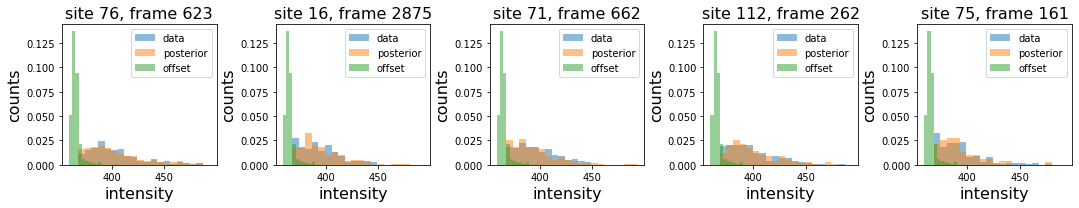

In [12]:
# spots missed by cosmos
mask = (model.z_marginal.numpy() < 0.5)

n, f = np.nonzero(mask)
idx = np.arange(len(n))
np.random.shuffle(idx)

plt.figure(figsize=(15,3))
for i in range(5):
    j = idx[i]
    plt.subplot(1, 5, i+1)
    plt.hist(
        model.data[n[j],f[j]].flatten().numpy(),
        range=(model.data.vmin, model.data.vmax),
        density=True, bins=20, alpha=0.5, label="data")
    plt.hist(
        samples["d/data"][0,n[j],f[j]].flatten().numpy(),
        range=(model.data.vmin, model.data.vmax),
        density=True, bins=20, alpha=0.5, label="posterior")
    plt.hist(
        model.data.offset.flatten().numpy(),
        #range=(model.data.vmin, model.data.vmax),
        density=True, bins=10, alpha=0.5, label="offset")
    #plt.ylim(0,30000)
    #plt.xlim(-0.03,1.03)
    plt.title("site {}, frame {}".format(n[j],f[j]), fontsize=16)
    plt.ylabel("counts", fontsize=16)
    plt.xlabel("intensity", fontsize=16)
    plt.legend()
plt.tight_layout()
plt.show()

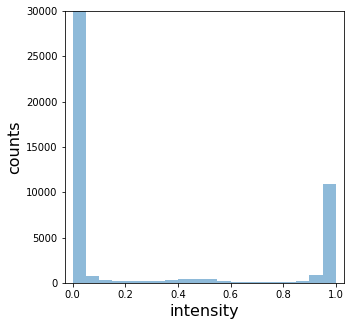

In [13]:
plt.figure(figsize=(5,5))
plt.hist(model.z_probs.flatten().numpy(),
         bins=20, alpha=0.5)
plt.ylim(0,30000)
plt.xlim(-0.03,1.03)
plt.ylabel("counts", fontsize=16)
plt.xlabel("intensity", fontsize=16)
plt.show()

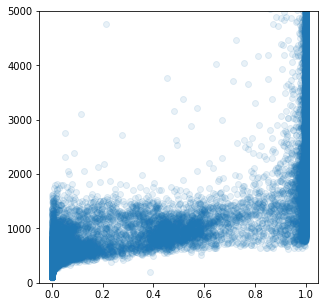

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(model.m_probs.flatten(), param("d/h_loc").data.flatten(), alpha=0.1)
plt.ylim(0,5000)
plt.show()

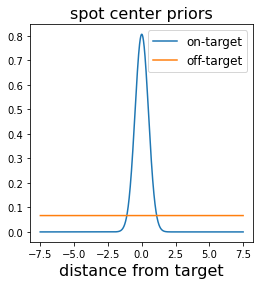

In [60]:
plt.figure(figsize=(4,4))
x = torch.arange(-7.5,7.5, 0.01)
d = AffineBeta(0., 230, -7.5, 7.5)
d2 = AffineBeta(0., 2., -7.5, 7.5)
plt.plot(x, d.log_prob(x).exp(), label="on-target")
plt.plot(x, d2.log_prob(x).exp(), label="off-target")
plt.xlabel("distance from target", fontsize=16)
plt.title("spot center priors", fontsize=16)
plt.legend(fontsize=12)
plt.show()

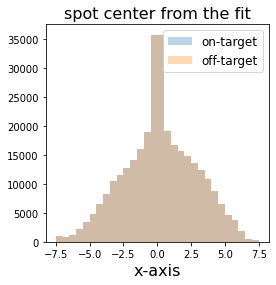

In [15]:
plt.figure(figsize=(4,4))
plt.hist(param("d/x_mean").data.flatten().numpy(), weights=model.z_probs.flatten().numpy(),
        range=(-7.5, 7.5), bins=30, alpha=0.3, label="on-target")
plt.hist(param("d/x_mean").data.flatten().numpy(), weights=model.j_probs.flatten().numpy(),
        range=(-7.5, 7.5), bins=30, alpha=0.3, label="off-target")
plt.xlabel("x-axis", fontsize=16)
plt.title("spot center from the fit", fontsize=16)
plt.legend(fontsize=12)
plt.show()

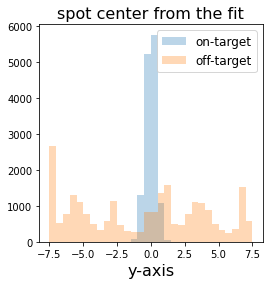

In [62]:
plt.figure(figsize=(4,4))
plt.hist(param("d/y_mean").data.flatten().numpy(), weights=model.z_probs.flatten().numpy(),
        range=(-7.5, 7.5), bins=30, alpha=0.3, label="on-target")
plt.hist(param("d/y_mean").data.flatten().numpy(), weights=model.j_probs.flatten().numpy(),
        range=(-7.5, 7.5), bins=30, alpha=0.3, label="off-target")
plt.xlabel("y-axis", fontsize=16)
plt.title("spot center from the fit", fontsize=16)
plt.legend(fontsize=12)
plt.show()

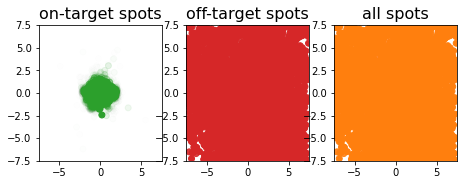

In [44]:
plt.figure(figsize=(7.5,2.5))


plt.subplot(1,3,1)
colors = np.zeros((model.K*model.data.N*model.data.F, 4))
colors += to_rgba_array("C2")
colors[:, 3] = model.z_probs.flatten()
plt.scatter(param("d/x_mean").data.flatten(), param("d/y_mean").data.flatten(), color=colors)
plt.xlim(-7.5,7.5)
plt.ylim(-7.5,7.5)
plt.title("on-target spots", fontsize=16)

plt.subplot(1,3,2)
colors = np.zeros((model.K*model.data.N*model.data.F, 4))
colors += to_rgba_array("C3")
colors[:, 3] = model.j_probs.flatten()
plt.scatter(param("d/x_mean").data.flatten(), param("d/y_mean").data.flatten(), color=colors)
plt.xlim(-7.5,7.5)
plt.ylim(-7.5,7.5)
plt.title("off-target spots", fontsize=16)

plt.subplot(1,3,3)
colors = np.zeros((model.K*model.data.N*model.data.F, 4))
colors += to_rgba_array("C1")
colors[:, 3] = model.m_probs.flatten()
plt.scatter(param("d/x_mean").data.flatten(), param("d/y_mean").data.flatten(), color=colors)
plt.xlim(-7.5,7.5)
plt.ylim(-7.5,7.5)
plt.title("all spots", fontsize=16)

plt.show()

### Intensity analysis

Intensity histogram (on-target spots)

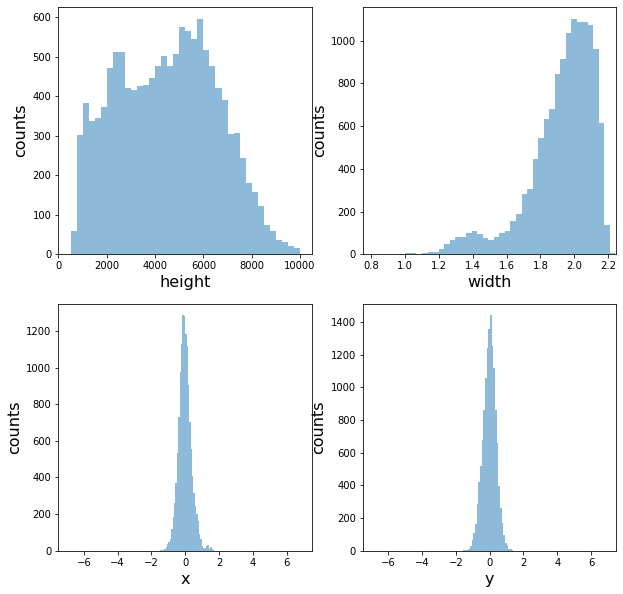

In [7]:
plt.figure(figsize=(10,10))
mask = model.z_probs > 0.5
plt.subplot(2,2,1)
plt.hist(param("d/h_loc").data[mask].numpy(),
         range=(0,10000), bins=40, alpha=0.5)
plt.xlim(0,)
plt.ylabel("counts", fontsize=16)
plt.xlabel("height", fontsize=16)

plt.subplot(2,2,2)
plt.hist(param("d/w_mean").data[mask].numpy(),
         bins=40, alpha=0.5)
plt.xlim(0.75,2.25)
plt.ylabel("counts", fontsize=16)
plt.xlabel("width", fontsize=16)

plt.subplot(2,2,3)
plt.hist(param("d/x_mean").data[mask].numpy(),
         bins=40, alpha=0.5)
plt.xlim(-7.5,7.5)
plt.ylabel("counts", fontsize=16)
plt.xlabel("x", fontsize=16)

plt.subplot(2,2,4)
plt.hist(param("d/y_mean").data[mask].numpy(),
         bins=40, alpha=0.5)
plt.xlim(-7.5,7.5)
plt.ylabel("counts", fontsize=16)
plt.xlabel("y", fontsize=16)
plt.show()

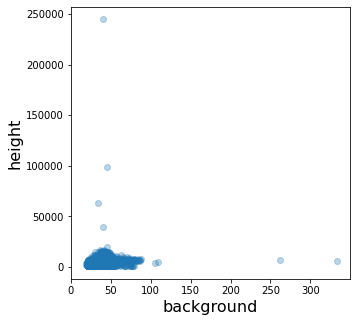

In [8]:
plt.figure(figsize=(5,5))
mask = model.z_probs > 0.5
plt.scatter(param("d/b_loc").data[mask.sum(0).bool()].numpy(), param("d/h_loc").data[mask].numpy(), alpha=0.3)
plt.xlim(0,)
plt.ylabel("height", fontsize=16)
plt.xlabel("background", fontsize=16)
plt.show()

### Binding rastergram

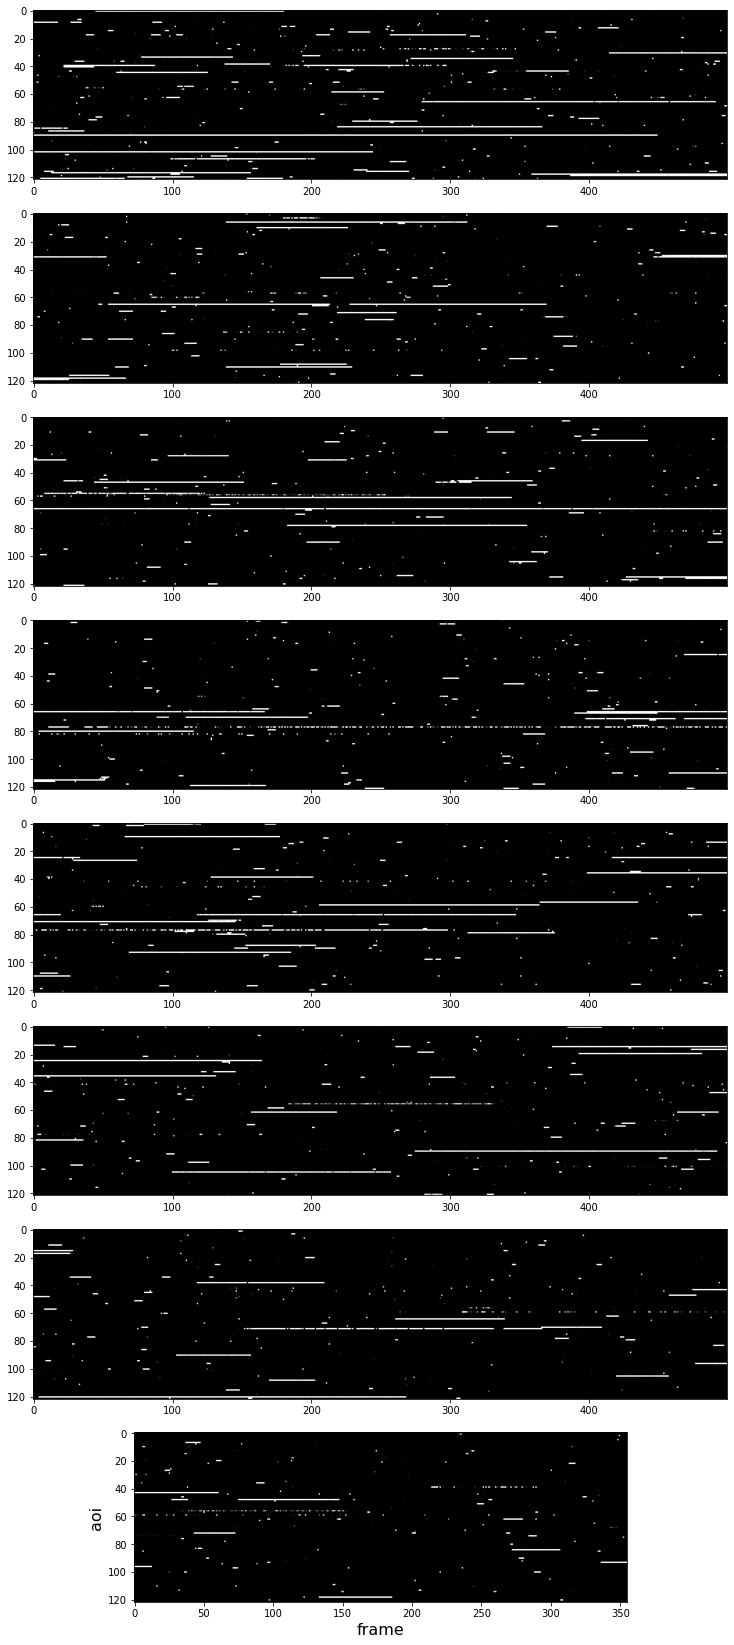

In [9]:
r = model.data.F // 500 + 1
figsize = torch.tensor([15, model.data.N * r * 15. / 500])
plt.figure(figsize=figsize)
for i in range(r):
    plt.subplot(r,1,i+1)
    plt.imshow(model.z_marginal[:, i*500:(i+1)*500], cmap="gray")
plt.xlabel("frame", fontsize=16)
plt.ylabel("aoi", fontsize=16)
plt.show()

### Time to first binding

$$ \mathrm{ttfb} = \sum_{f=1}^{F-1} f z_{n,f} \prod_{f^\prime=0}^{f-1} (1 - z_{n,f^\prime})
    + F \prod_{f^\prime=0}^{F-1} (1 - z_{n,f^\prime}) $$

$$ \mathbb{E}[\mathrm{ttfb}] = \sum_{f=1}^{F-1} f q(z_{n,f}=1) \prod_{f^\prime=f-1}^{f-1} q(z_{n,f^\prime}=0)
    + F \prod_{f^\prime=0}^{F-1} q(z_{n,f^\prime}=0) $$

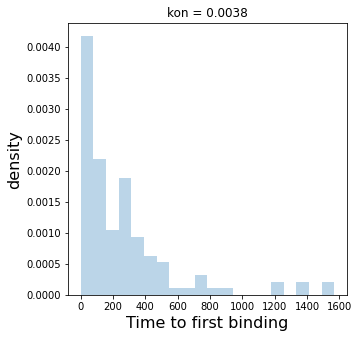

In [10]:
frames = torch.arange(1, model.data.F+1)
q1 = torch.ones(model.data.N, model.data.F)
q1[:, :-1] = model.z_marginal[:, 1:]
cumq0 = torch.cumprod(1 - model.z_marginal, dim=-1)
ttfb = (frames * q1 * cumq0).sum(-1)

plt.figure(figsize=(5,5))
plt.title("kon = {:.4f}".format(1/ttfb.mean()))
plt.hist(ttfb.numpy(), bins=20, density=True, alpha=0.3)
#plt.hist(sttfb, bins=20, density=True, alpha=0.3)
plt.xlabel("Time to first binding", fontsize=16)
plt.ylabel("density", fontsize=16)
plt.show()

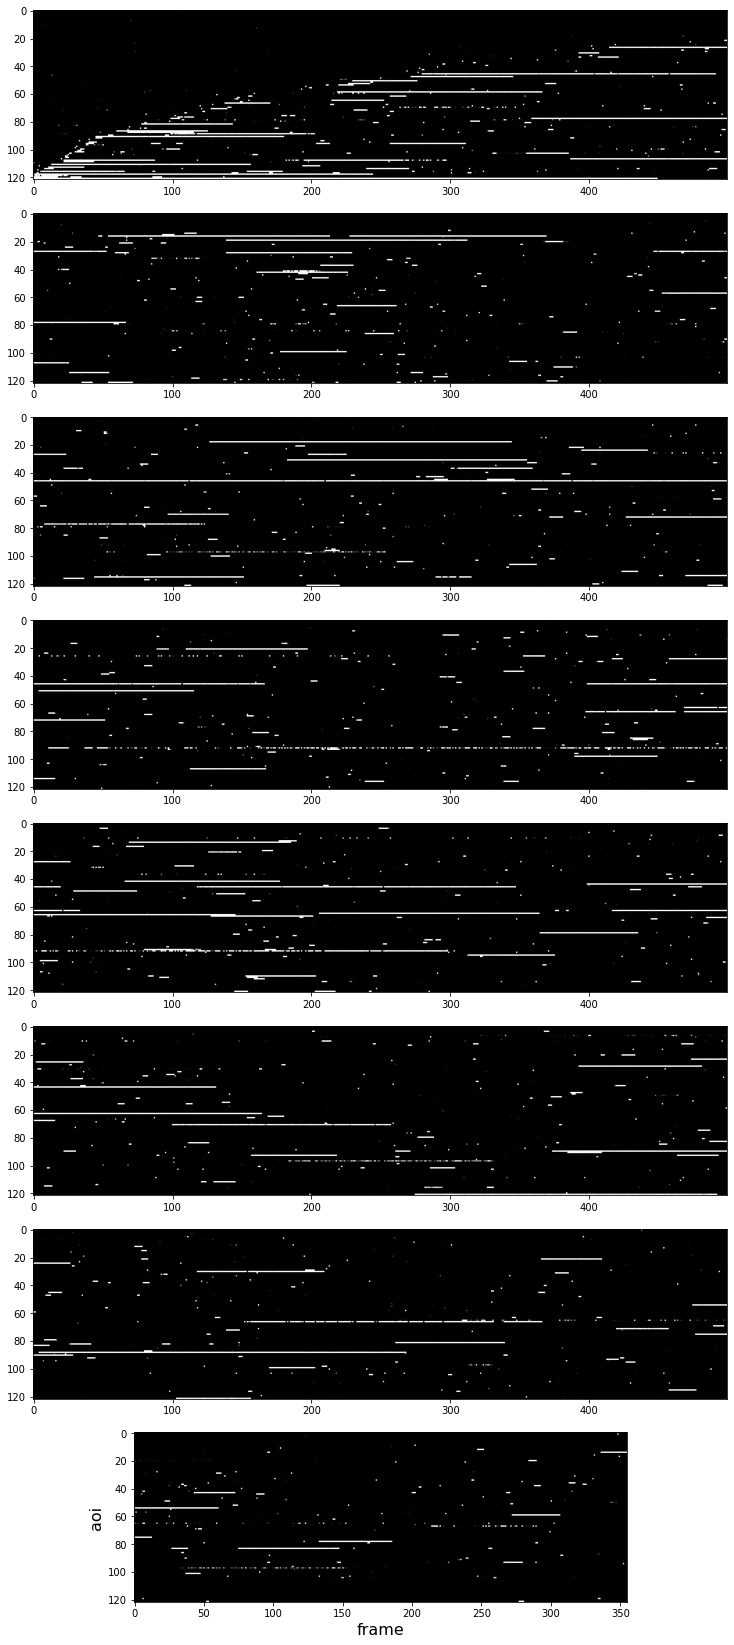

In [11]:
# sort ttfb
sdx = torch.argsort(ttfb, descending=True)

plt.figure(figsize=figsize)
for i in range(r):
    plt.subplot(r,1,i+1)
    plt.imshow(model.z_marginal[sdx, i*500:(i+1)*500], cmap="gray")
plt.xlabel("frame", fontsize=16)
plt.ylabel("aoi", fontsize=16)
plt.show()

### HMM analysis


$$ A_{01} = \sum_{n=0}^{N-1} \sum_{f=1}^{F-1} \dfrac{(1-z_{n,f-1}) z_{n,f}}{\sum_{n^\prime=0}^{N-1} \sum_{f^\prime=1}^{F-1} (1-z_{n^\prime,f^\prime-1})} $$

$$ A_{10} = \dfrac{\sum_n^N \sum_f^F z_{n,f} (1-z_{n,f+1})}{\sum_n^N \sum_f^F z_{n,f}} $$

In [12]:
samples = dist.Bernoulli(model.z_marginal).sample((100,))

bind = (samples[..., :-1] < samples[..., 1:]).sum((-1))
dissociate = (samples[..., :-1] > samples[..., 1:]).sum(-1)

a01 = ((1 - samples[..., :-1]) * samples[..., 1:] / (1-samples[..., :-1]).sum((-2,-1), keepdim=True)).sum((-2,-1))
a10 = ((samples[..., :-1]) * (1 - samples[..., 1:]) / (samples[..., :-1]).sum((-2,-1), keepdim=True)).sum((-2,-1))

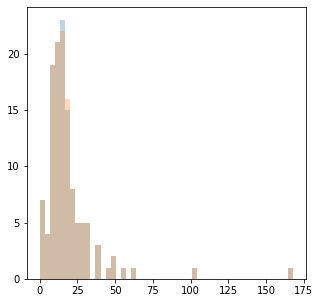

In [13]:
plt.figure(figsize=(5,5))
plt.hist(bind[0].numpy(), bins=50, alpha=0.3)
plt.hist(dissociate[0].numpy(), bins=50, alpha=0.3)
#plt.xlim(0,60)
plt.show()

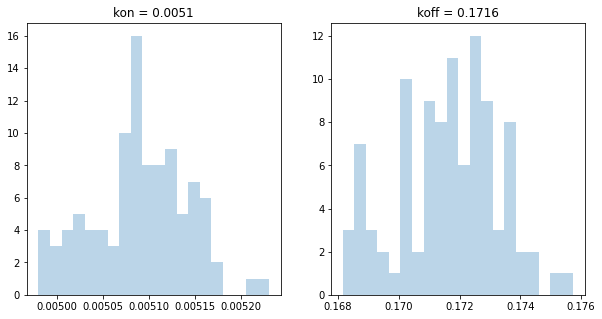

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(a01.flatten().numpy(), bins=20, alpha=0.3)
plt.title("kon = {:.4f}".format(a01.mean()))
plt.subplot(1,2,2)
plt.hist(a10.flatten().numpy(), bins=20, alpha=0.3)
plt.title("koff = {:.4f}".format(a10.mean()))
plt.show()

Let's find and remove high-frequency traces

/home/ordabayev/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  """Entry point for launching an IPython kernel.


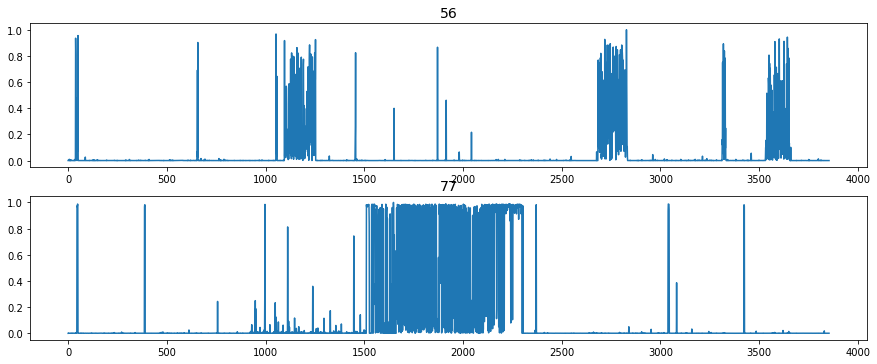

In [15]:
high_frequency = torch.nonzero(bind[0] > 80).squeeze()
r = len(high_frequency) + 1
plt.figure(figsize=(15,3*r))
for i, n in enumerate(high_frequency):
    plt.subplot(r,1,i+1)
    plt.title(n.item(), fontsize=14)
    plt.plot(model.z_marginal[n])
plt.show()

In [16]:
low_frequency = torch.nonzero(bind[0] <= 80).squeeze()
a01 = ((1 - samples[:, low_frequency, :-1]) * samples[:, low_frequency, 1:] / (1-samples[:, low_frequency, :-1]).sum((-2,-1), keepdim=True)).sum((-2,-1))
a10 = ((samples[:, low_frequency, :-1]) * (1 - samples[:, low_frequency, 1:]) / (samples[:, low_frequency, :-1]).sum((-2,-1), keepdim=True)).sum((-2,-1))

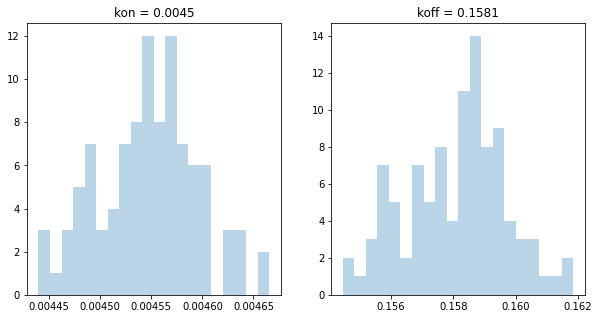

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(a01.flatten().numpy(), bins=20, alpha=0.3)
plt.title("kon = {:.4f}".format(a01.mean()))
plt.subplot(1,2,2)
plt.hist(a10.flatten().numpy(), bins=20, alpha=0.3)
plt.title("koff = {:.4f}".format(a10.mean()))
plt.show()

Now let's see how real data kinetics compares to the simulated kinetics from the best fit

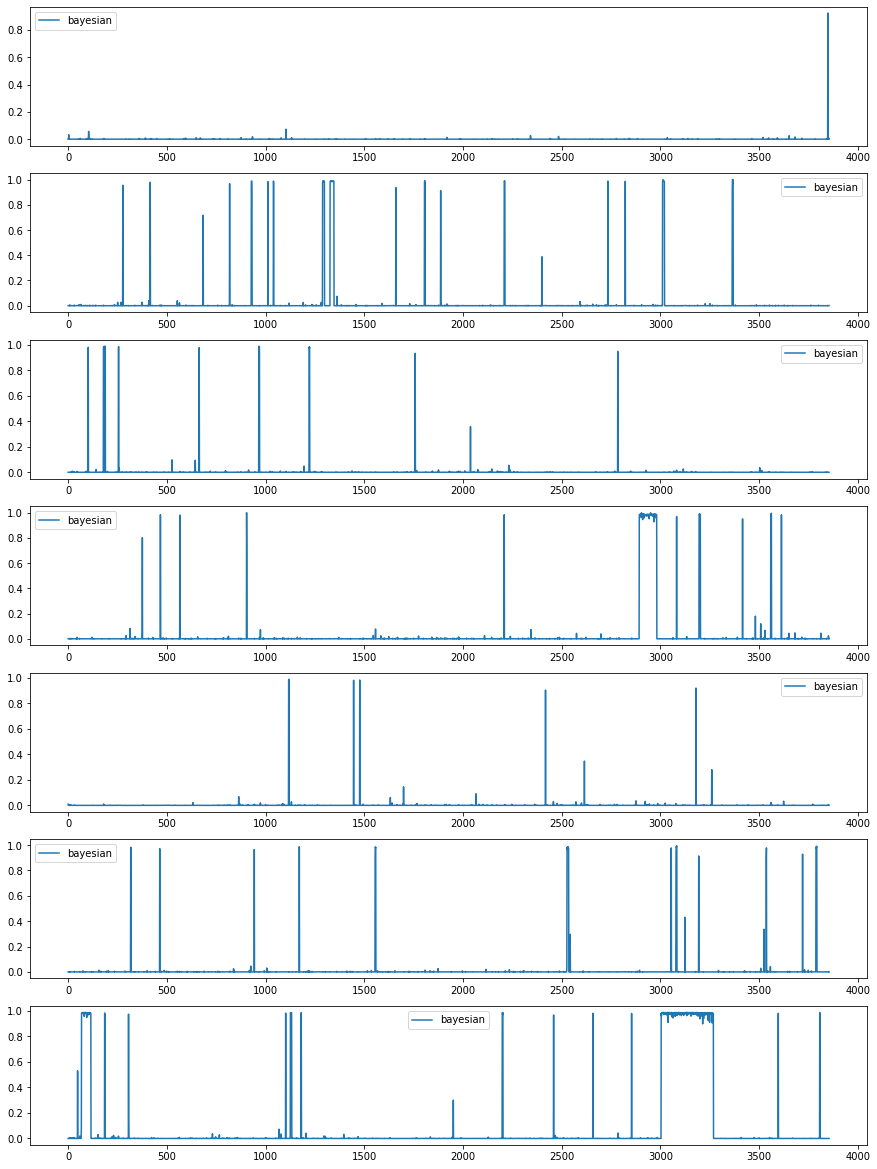

In [18]:
# look at 5, 15, 30, 35
examples = [5, 11, 12, 20, 50, 100, 120]
r = len(examples) + 1
plt.figure(figsize=(15,3*r))
for i, n in enumerate(examples):
    plt.subplot(r,1,i+1)
    plt.plot(model.z_marginal[n], label="bayesian")
    plt.legend()
plt.show()

### Simulated trace

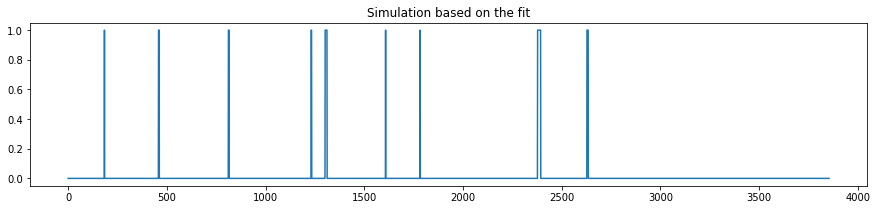

In [19]:
A = torch.tensor([[1-a01.mean(), a01.mean()], [a10.mean(), 1-a10.mean()]])

x = torch.zeros(model.data.F)
for i in range(1,model.data.F):
    x[i] = dist.Bernoulli(A[x[i-1].long()][1]).sample().item()

plt.figure(figsize=(15,3))
plt.title("Simulation based on the fit")
plt.plot(x)
plt.show()

## Appendix

$$ p(\mathbf{z}) = \prod_{n=0}^{N-1} p(z_{n,0}|\pi) \prod_{f=1}^{F-1} p(z_{n,f}|z_{n,f-1}, A) $$

$$ \log p(\mathbf{z}) = \sum_{n=0}^{N-1} \left ( \log p(z_{n,0}|\pi) + \sum_{f=1}^{F-1} \log p(z_{n,f}|z_{n,f-1}, A_{01}, A_{10}) \right ) $$

$$ \log p(\mathbf{z}) = \sum_{n=0}^{N-1} \left ( (1-z_{n,0}) \log (1-\pi) + z_{n,0} \log \pi +
    \sum_{f=1}^{F-1} \left (
        (1 - z_{n,f-1}) (1 - z_{n,f}) \log (1 - \frac{A_{01}}{2})
        + (1-z_{n,f-1}) z_{n,f} \log \frac{A_{01}}{2}
        + z_{n,f-1} (1 - z_{n,f}) \log \frac{1+A_{10}}{2}
        + z_{n,f-1} z_{n,f} \log (1 - A_{10}) \right ) \right ) $$

$$ \log p(\mathbf{z}) = \sum_{n=0}^{N-1} \left ( (1-z_{n,0}) \log (1-\pi) + z_{n,0} \log \pi +
    \sum_{f=1}^{F-1} \left (
        (1 - z_{n,f-1}) (1 - z_{n,f}) \log (1 - A_{01})
        + (1-z_{n,f-1}) z_{n,f} \log A_{01}
        + z_{n,f-1} (1 - z_{n,f}) \log A_{10}
        + z_{n,f-1} z_{n,f} \log (1 - A_{10}) \right ) \right ) $$

$$ \dfrac{\partial \log p(\mathbf{z})}{\partial \pi}
 = \sum_{n=0}^{N-1} \left ( -\dfrac{1-z_{n,0}}{1-\pi} + \dfrac{z_{n,0}}{\pi} \right ) = 0 $$
 
$$ \sum_{n=0}^{N-1} \left ( \dfrac{(1-\pi) z_{n,0} - \pi (1-z_{n,0})}{\pi (1-\pi)} \right ) = 0 $$

$$ \dfrac{\partial \log p(\mathbf{z})}{\partial A_{01}}
 = \sum_{n=0}^{N-1} \sum_{f=1}^{F-1} \left (
     \dfrac{-(1-z_{n,f-1})(1-z_{n,f})}{1-A_{01}}
     + \dfrac{(1-z_{n,f-1})z_{n,f}}{A_{01}} \right ) = 0 $$

$$ \sum_{n=0}^{N-1} \left ( z_{n,0} - \pi \right ) = 0 $$

$$ \pi = \dfrac{1}{N} \sum_{n=0}^{N-1} z_{n,0} $$

$$ \mathbb{E}_{q(\mathbf{z})} \left [ \pi \right ] = \dfrac{1}{N} \sum_{n=0}^{N-1} q(z_{n,0}=1) $$

$$ \sum_{n=0}^{N-1} \sum_{f=1}^{F-1} \left ( (1-A_{01}) (1-z_{n,f-1})z_{n,f} - A_{01} (1-z_{n,f-1})(1-z_{n,f}) \right ) = 0 $$

$$ \sum_{n=0}^{N-1} \sum_{f=1}^{F-1} (1-z_{n,f-1}) z_{n,f} - \sum_{n=0}^{N-1} \sum_{f=1}^{F-1} (1-z_{n,f-1}) A_{01} = 0 $$

$$ \sum_{n=0}^{N-1} \sum_{f=1}^{F-1} (1-z_{n,f-1}) z_{n,f} = \sum_{n=0}^{N-1} \sum_{f=1}^{F-1} (1-z_{n,f-1}) A_{01} $$

$$ A_{01} = \sum_{n=0}^{N-1} \sum_{f=1}^{F-1} \dfrac{(1-z_{n,f-1}) z_{n,f}}{\sum_{n^\prime=0}^{N-1} \sum_{f^\prime=1}^{F-1} (1-z_{n^\prime,f^\prime-1})} $$

$$ A_{10} = \dfrac{\sum_n^N \sum_f^F z_{n,f} (1-z_{n,f+1})}{\sum_n^N \sum_f^F z_{n,f}} $$

$$ \mathbb{E}_{q(\mathbf{z})} \left [ A_{01} \right ]
    = \sum_\mathbf{z} \sum_n^N \sum_f^F \dfrac{(1-z_{n,f}) z_{n,f+1}}{\sum_{n^\prime}^N \sum_{f^\prime}^F (1-z_{n^\prime,f^\prime})} q(\mathbf{z}) $$

$$  = \sum_n^N \sum_f^F q(z_{n,f}=0) q(z_{n,f+1}=1) \sum_{\mathbf{z} \backslash z_{n,f},z_{n,f+1}}
    \dfrac{1}{1 + 0 + \sum_{n^\prime}^N \sum_{f^\prime}^F (1-z_{n^\prime,f^\prime})} q(\mathbf{z}) $$